# Data pipeline

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os
import random

In [2]:
images = os.listdir(r"C:\Users\Nicolas Boizard\OneDrive - JUNIA Grande école d'ingénieurs\M2\AI\Multi-Video-Temporal-Synchronization\datasets\ISIA\0\left")
len(images)

11946

In [3]:
path = r"C:\Users\Nicolas Boizard\OneDrive - JUNIA Grande école d'ingénieurs\M2\AI\Multi-Video-Temporal-Synchronization\datasets\ISIA"

# Get data from all the directories
ds = [] #0->leftWrong, 1->rightWrong, 2->leftPair, 3->rightPair
for label in range(0,2):
  for side in ['left', 'right']:
    tmp = tf.keras.utils.image_dataset_from_directory(
        fr"{path}/{label}/{side}",
        color_mode="grayscale",
        image_size=(224, 224),
        batch_size=None,
        labels=None,
        shuffle=False
      )
    tmp = tmp.map(lambda x: x/255)
    ds.append(tmp)

wrong = tf.data.Dataset.zip((ds[0], ds[1]))
pair = tf.data.Dataset.zip((ds[2], ds[3]))

# Create labels
wrongLables = tf.zeros([len(images)])
wrongLables = tf.data.Dataset.from_tensor_slices(wrongLables)
wrong = tf.data.Dataset.zip((wrong, wrongLables))

pairLabels = tf.ones([len(images)])
pairLabels = tf.data.Dataset.from_tensor_slices(pairLabels)
pair = tf.data.Dataset.zip((pair, pairLabels))

# Create the dataset
dataset = tf.data.Dataset.sample_from_datasets([pair, wrong], weights=[0.5, 0.5])

Found 11946 files belonging to 1 classes.
Found 11946 files belonging to 1 classes.
Found 11946 files belonging to 1 classes.
Found 11946 files belonging to 1 classes.


## Split dataset

In [4]:
ds_train=dataset.take(200)
ds_test=dataset.skip(200)


In [5]:
ds_train=ds_train.shuffle(200)

## Preview images

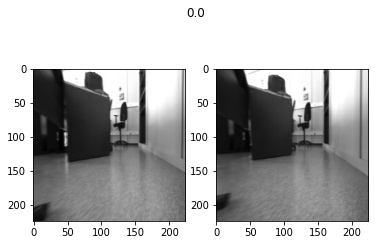

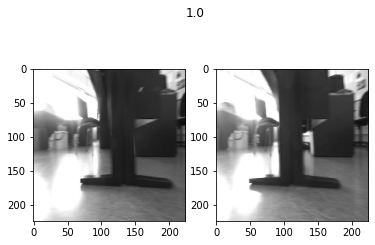

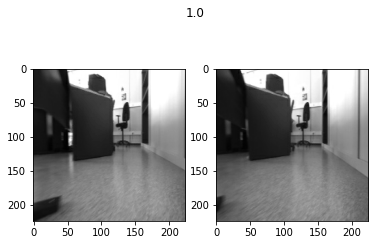

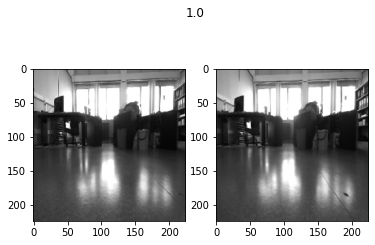

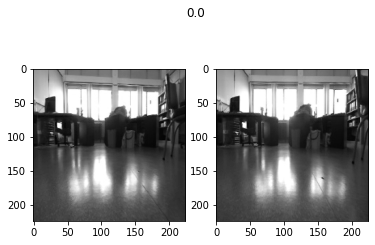

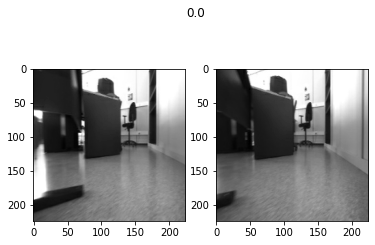

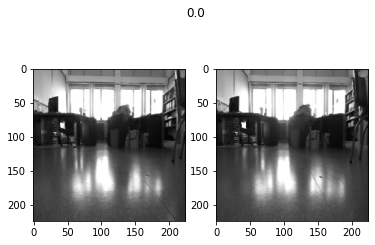

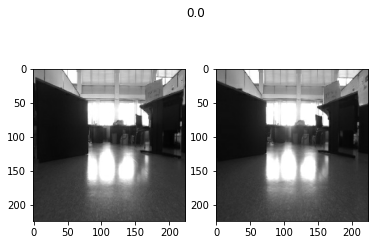

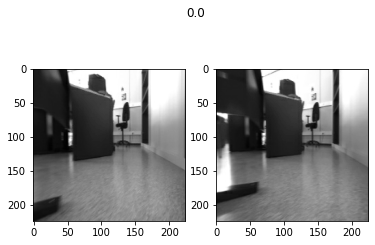

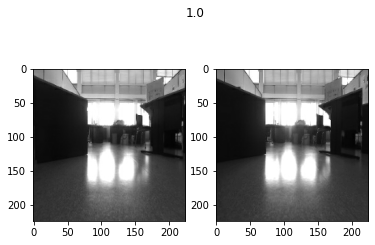

In [7]:
for images, labels in ds_train.take(10):
    f, axarr = plt.subplots(1,2)
    f.suptitle(labels.numpy())
    axarr[0].imshow(images[0][:,:,0].numpy(), cmap='gray', clim=(0,1))
    axarr[1].imshow(images[1][:,:,0].numpy(), cmap='gray', clim=(0,1))